# Analysis of deviations from normality

Much work in mathematical finance assumes that prices follow a lognormal geometric random walk or its continuous-time analog, geometric Brownian
motion. So a natural question is whether this assumption is usually true. The lognormal geometric random walk makes two assumptions: [[1]]

    1. the log returns are normally distributed and 
    2. the log returns are mutually independent.

In this document we will analyze whether the first assumption holds in real stock data and we will skip the second assumption for a later analysis.

First, we will simulate some stock returns that follow a geometric random walk, to get a feeling of what would the data look like in that case. Afterwards, we will download the data from the Fama and French library for the returns of small and big caps stocks and we will analyze whether the normality assumption holds.

By: Ismael Jiménez

License: MIT

Import the necessary quantopy subpackages.

In [1]:
import quantopy as qp

## Simulate Geometric Random Walk Returns

In [85]:
import numpy as np
import quantopy as qp
import scipy.stats

#log_returns = qp.ReturnDataFrame(np.random.normal([0.1, 0.1], [0.4, 0.3], (1000, 2)))
#returns = log_returns.apply(np.exp) - 1

log_returns = qp.ReturnSeries(np.random.normal(0.1, 0.4, 1000))
returns = log_returns.apply(np.exp) - 1

#log_returns.plot.density()

scipy.stats.jarque_bera(log_returns)
#log_returns.aggregate(scipy.stats.jarque_bera)
#(returns).aggregate(scipy.stats.skew)
#returns.head()

Jarque_beraResult(statistic=1.0402978232544977, pvalue=0.5944320235392853)

## Retrieve portfolio data

In this document we will use the data for the returns of equal-weighted portfolios divided on size, retrieved from the Fama and French library. 

First we need to download the data of all portfolios divided on size, and we will list all options available for portfolio selection.

In [71]:
ds = qp.get('Portfolios_Formed_on_ME', 'famafrench', end='2018-12')
print(ds['DESCR'])

Portfolios Formed on ME
-----------------------

This file was created by CMPT_ME_RETS using the 202104 CRSP database. It contains value- and equal-weighted returns for size portfolios. Each record contains returns for: Negative (not used) 30% 40% 30%   5 Quintiles  10 Deciles The portfolios are constructed at the end of Jun. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Value Weight Returns -- Monthly (1110 rows x 19 cols)
  1 : Equal Weight Returns -- Monthly (1110 rows x 19 cols)
  2 : Value Weight Returns -- Annual from January to December (92 rows x 19 cols)
  3 : Equal Weight Returns -- Annual from January to December (92 rows x 19 cols)
  4 : Number of Firms in Portfolios (1110 rows x 19 cols)
  5 : Average Firm Size (1110 rows x 19 cols)


Now we can select the data for the equal-weighted portfolios.

In [72]:
portfolio = ds[1]
portfolio.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,NaN,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0142,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
1926-08,NaN,0.0374,0.0304,0.0209,0.0360,0.0359,0.0371,0.0161,0.0233,0.0461,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
1926-09,NaN,-0.0107,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0091,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
1926-10,NaN,-0.0329,-0.0352,-0.0306,-0.0325,-0.0410,-0.0289,-0.0336,-0.0295,-0.0472,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
1926-11,NaN,-0.0046,0.0382,0.0309,-0.0054,0.0218,0.0341,0.0339,0.0316,-0.0077,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


As we want to work with small and big caps, we will retrieve the data from the companies in the top and bottom decile.

In [73]:
columns = ['Lo 10', 'Hi 10']
returns = portfolio[columns]
returns.columns = ['SmallCap', 'BigCap']
returns.head()

,SmallCap,BigCap
Date,,
1926-07,-0.0142,0.0329
1926-08,0.0461,0.0370
1926-09,0.0091,0.0067
1926-10,-0.0472,-0.0243
1926-11,-0.0077,0.0270


We can now plot the returns, to get an overall feeling of the behaviour of the two return series.  

<AxesSubplot:title={'center':'Stock Returns'}, xlabel='Date'>

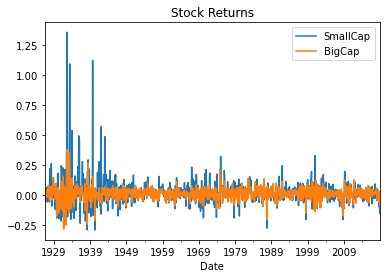

In [74]:
returns.plot(title='Stock Returns')

We can easily see from the graph that historically Small Caps have been more volatile than big cap. In the next steps we will see by how much and what does that mean in terms of risk adjusted performance.

In [ ]:
# Aqui

In [76]:
import pandas as pd
pd.concat([returns.mean(), returns.median(), returns.mean()>returns.median()], axis='columns')

,0,1,2
SmallCap,0.017565,0.01045,True
BigCap,0.008870,0.01140,False


In [78]:
#returns

In [83]:
import numpy as np

log_returns = (returns + 1).apply(np.log)
#log_returns.plot.density()
log_returns.aggregate(scipy.stats.kurtosis)

SmallCap    15.962391
BigCap       6.863593
dtype: float64

In [105]:
import scipy.stats
returns.aggregate(scipy.stats.skew)

SmallCap    4.455049
BigCap      0.233533
dtype: float64

In [106]:
log_returns.aggregate(scipy.stats.skew)

SmallCap    1.912991
BigCap     -0.485046
dtype: float64

In [98]:
returns

,SmallCap,BigCap
Date,,
1926-07,-0.0142,0.0329
1926-08,0.0461,0.0370
1926-09,0.0091,0.0067
1926-10,-0.0472,-0.0243
1926-11,-0.0077,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0140,0.0087
2018-10,-0.0991,-0.0657


In [103]:
returns.aggregate(scipy.stats.kurtosis)

SmallCap    44.462823
BigCap       7.693149
dtype: float64

In [104]:
log_returns.aggregate(scipy.stats.kurtosis)

SmallCap    15.962391
BigCap       6.863593
dtype: float64

In [91]:
returns.aggregate(scipy.stats.jarque_bera)

,SmallCap,BigCap
0,95105.376811,2747.374185
1,0.000000,0.000000


In [70]:
returns.shape

(1110, 3)

In [72]:
from quantopy.random import generator
import numpy as np

np.random.seed(100)

<AxesSubplot:title={'center':'Stock Prices'}>

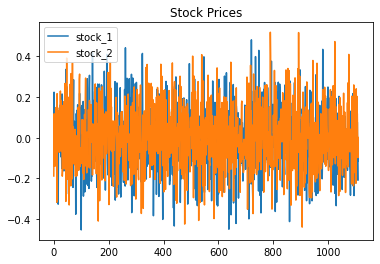

In [74]:
stock_returns = generator.returns(mu = [0, 0], sigma = [0.15, 0.15], size = 1110)
stock_returns.columns = ['stock_1', 'stock_2']
stock_returns.plot(title='Stock Prices')

In [76]:
stock_returns.aggregate(scipy.stats.skew)

stock_1   -0.011837
stock_2    0.094985
dtype: float64

In [81]:
stock_returns.aggregate(scipy.stats.kurtosis)

stock_1   -0.058432
stock_2    0.063860
dtype: float64

In [82]:
stock_returns.aggregate(scipy.stats.jarque_bera)

,stock_1,stock_2
0,0.183834,1.857709
1,0.912181,0.395006


In [ ]:
# Aqui

## Analysis of basice shape characteristics of probability distribution

Very often we would like to know certain shape characteristics of a probability distribution. We might want to know where the distribution is centered, and how spread out the distribution is about the central value. Inthis section we will calculate the two most basic shape characteristics of a probability distribution:

1. expected value (mean): measures the center of mass of a distribution

2. variance and standard deviation: measures the spread about the mean

### Expected Return

In [21]:
returns.gmean()

SmallCap    0.012954
BigCap      0.007423
dtype: float64

#### Expected Return: annualized

In [12]:
returns.effect(qp.stats.period.MONTHLY)

SmallCap    0.167015
BigCap      0.092804
dtype: float64

We can see that Small Caps stocks had a mean yearly return for the period of of almost double of the Big Caps return.

### Standard Deviation of returns

In [13]:
returns.std()

SmallCap    0.106389
BigCap      0.053903
dtype: float64

#### Standard Returns: Annualized

In [14]:
returns.effect_vol(qp.stats.period.MONTHLY)

SmallCap    0.368543
BigCap      0.186726
dtype: float64

As we had already anticipated, we can see that the annualized standard deviation of returns for Small Caps (36.8%) is almost double the standard deviation of returns for Big Caps (18.7%).

## Sharpe Ratio

Now that we have the return and the risk, we can measure a the sharpe of ratio to get a quick look whether the extra volatility of Small Caps is worth the extra returns. [[1]] 

Sharpe’s ratio can be thought of as a “reward- to-risk” ratio. It is the ratio of the reward quantified by the excess expected return to the risk as measured by the standard deviation. If $E(R_{P})$ and $\sigma_{Rp}$ are the expected return and standard deviation of the return on a portfolio and $\mu_{f}$ is the risk-free rate, then
$$ \frac{E(R_{P}) - \mu_{f}}{\sigma_{Rp}}$$
is Sharpe’s ratio of the portfolio. [[2]]

Now, let´s calculate the Sharpe ratio for small and big caps with the assumption of a yearly risk-free rate of 3%.

In [15]:
returns.sharpe_ratio(riskfree_rate=0.03, period=qp.stats.period.MONTHLY)

SmallCap    0.371774
BigCap      0.336345
dtype: float64

By just looking at the sharpe ratio it looks that the Small Caps did in fact gave a slightly superior risk adjusted return over big cap stocks [[1]].

## Compute Maximum Drawdown
The drawdown measures the maximum loss from the previous high to a subsequent low. That is, how much would an investor have lost if he would have bought a the maximum high and he would have sold at the very bottom.

Some drawback of this measure is that it is entirely defined by two points, and as such it is very sensitive to outliers, and its value depend on the frequency of observations (e.g. daily, weekly, ...). In spite of these shortcomings drawdowns are closely monitored and popular amongst practitioners [[1]].

Let´s first retrieve and plot the historical drawdown for both portfolios:

<AxesSubplot:xlabel='Date'>

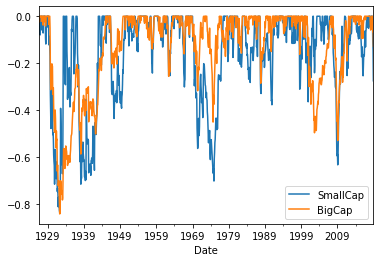

In [16]:
drawdown = returns.drawdown()
drawdown.plot()

We can see that there was a huge drawdown for both portfolios in the early 30´s. This maximum drawdown for both portfolios was:

In [17]:
drawdown.min()

SmallCap   -0.834619
BigCap     -0.840038
dtype: float64

and happened on the:

In [18]:
drawdown.idxmin()

SmallCap    1932-05
BigCap      1932-05
dtype: period[M]

So, we see that on May of 1932 both portfolios had a drawdown of around 84% from their previous peaks.

We can also analyze what has been the maximum drawdown, if we exclude the 30´s period. For example, the maximum drawdown for both portfolios since 1940 was:

In [19]:
drawdown.loc["1940":].min()

SmallCap   -0.700387
BigCap     -0.528095
dtype: float64

and happened on the:

In [20]:
drawdown.loc["1940":].idxmin()

SmallCap    1974-12
BigCap      2009-02
dtype: period[M]

## Sources

[1] Ruppert and Matteson " Statistics and Data Analysis for Financial Engineering, 2nd edition", *Springer*. Chapter §2.2.3

[2] Vijay Vaidyanathan "Risk Adjusted Returns" EDHEC-Risk Institute.